Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
!ls /content/


drive  sample_data


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180
IMG_SIZE=(img_height,img_width)

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

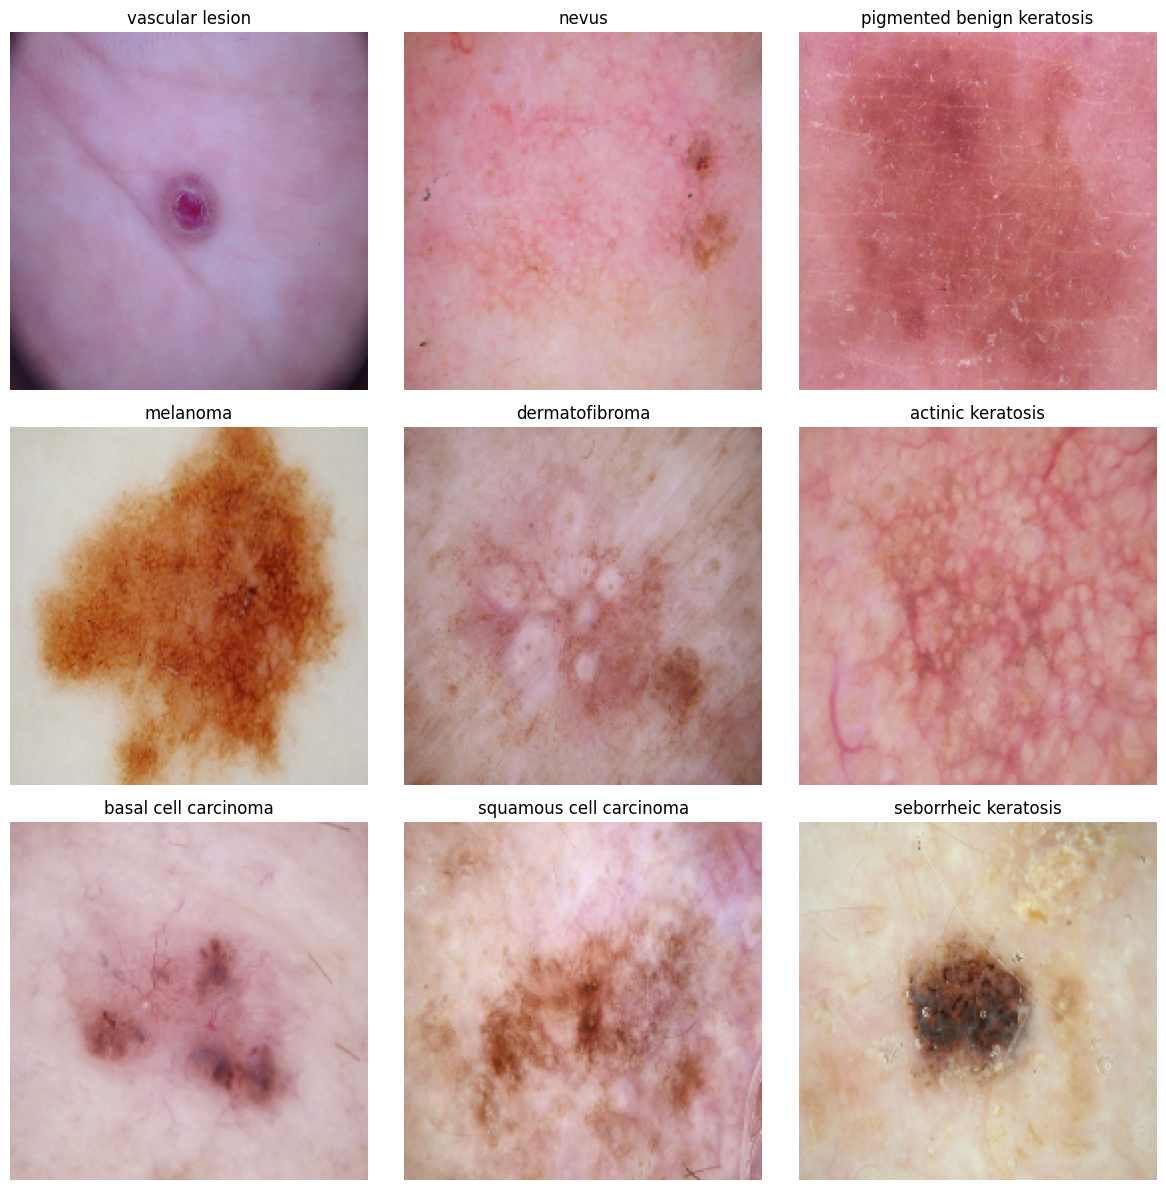

In [11]:
import matplotlib.pyplot as plt

# Create a set to keep track of the classes already visualized
visualized_classes = set()

# Create the plot
plt.figure(figsize=(12, 12))

# Loop through the dataset and visualize one image per class
for images, labels in train_ds:
    for i in range(len(labels)):
        class_index = labels[i].numpy()  # Get the class index from the label tensor
        class_name = class_names[class_index]  # Get the class name
        if class_name not in visualized_classes:  # Check if the class has been visualized
            ax = plt.subplot(3, 3, len(visualized_classes) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
            plt.title(class_name)
            plt.axis("off")
            visualized_classes.add(class_name)  # Add class to the visualized set
        if len(visualized_classes) == 9:  # If all 9 classes have been visualized, break
            break
    if len(visualized_classes) == 9:  # Break the outer loop as well
        break

plt.tight_layout()
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

from tensorflow.keras import layers, models

# Define the CNN model architecture
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalizing pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 output classes
])

# Print the model summary to check the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,554,377 (21.19 MB)

 Trainable params: 5,554,377 (21.19 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,554,377 (21.19 MB)

 Trainable params: 5,554,377 (21.19 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.1754 - loss: 2.1092 - val_accuracy: 0.2394 - val_loss: 2.0088
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.2790 - loss: 1.9049 - val_accuracy: 0.3602 - val_loss: 1.7483
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4037 - loss: 1.6406 - val_accuracy: 0.4452 - val_loss: 1.5420
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4819 - loss: 1.4787 - val_accuracy: 0.4541 - val_loss: 1.4882
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.4904 - loss: 1.4617 - val_accuracy: 0.4698 - val_loss: 1.5530
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5177 - loss: 1.3807 - val_accuracy: 0.5145 - val_loss: 1.3564
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5115 - loss: 1.3710 - val_accuracy: 0.5347 - val_loss: 1.3740
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5603 - loss: 1.2479 - val_accuracy: 0.4944 - v

### Visualizing training results

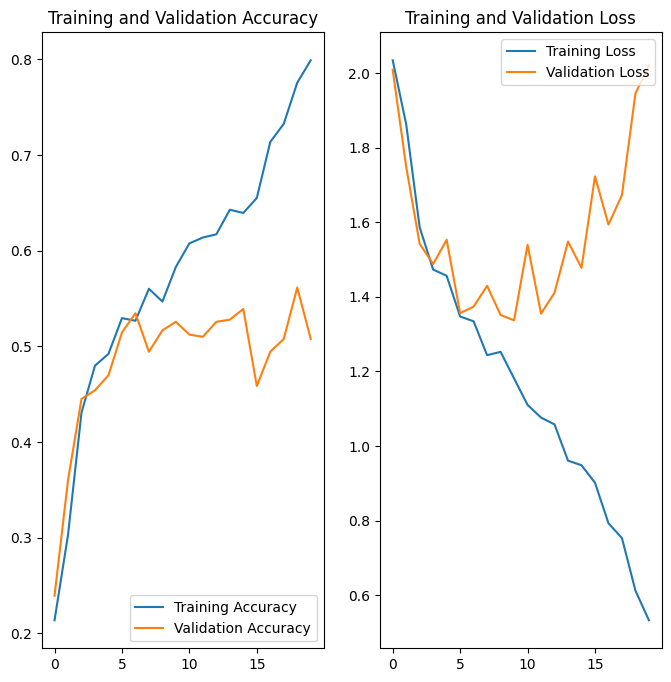

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

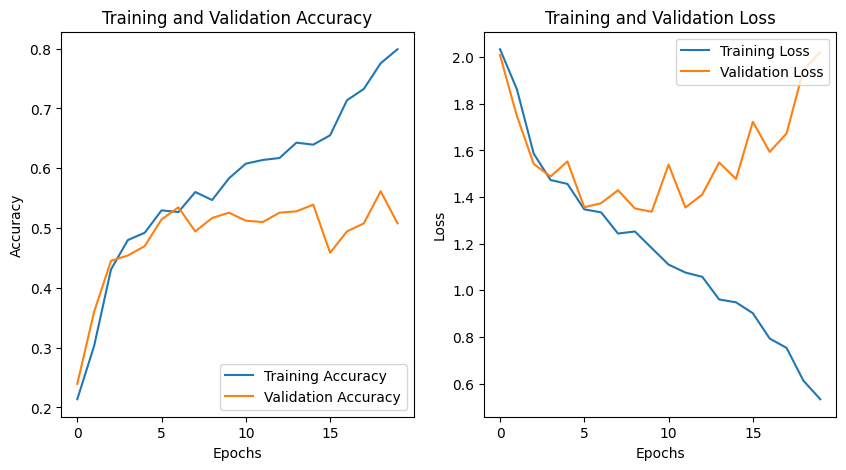

In [18]:
# Analyzing the model fit history for signs of overfitting or underfitting
# You can visualize the training and validation metrics to get insights
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

In [19]:
# Evaluate findings
if val_acc[-1] < acc[-1] and val_loss[-1] > loss[-1]:
    print("The model is likely overfitting. Training accuracy is high, but validation accuracy is low.")
elif val_acc[-1] < 0.5:
    print("The model might be underfitting, as validation accuracy is low.")
else:
    print("The model seems to be fitting well.")

The model is likely overfitting. Training accuracy is high, but validation accuracy is low.


In [20]:
# Get the training and validation accuracy from history
training_accuracy = history.history['accuracy'][-1] * 100  # Last epoch training accuracy
validation_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy

print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Training Accuracy: 79.91%
Validation Accuracy: 50.78%


The model shows signs of overfitting, with high training accuracy (79.91%) but much lower validation accuracy (50.78%)

### Write your findings here

In [21]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),  # Rotate images by up to 20%
    layers.RandomZoom(0.1),      # Zoom images by up to 10%
    layers.RandomContrast(0.1),  # Adjust contrast by up to 10%
    layers.RandomTranslation(0.1, 0.1)  # Shift images by 10% of width and height
])


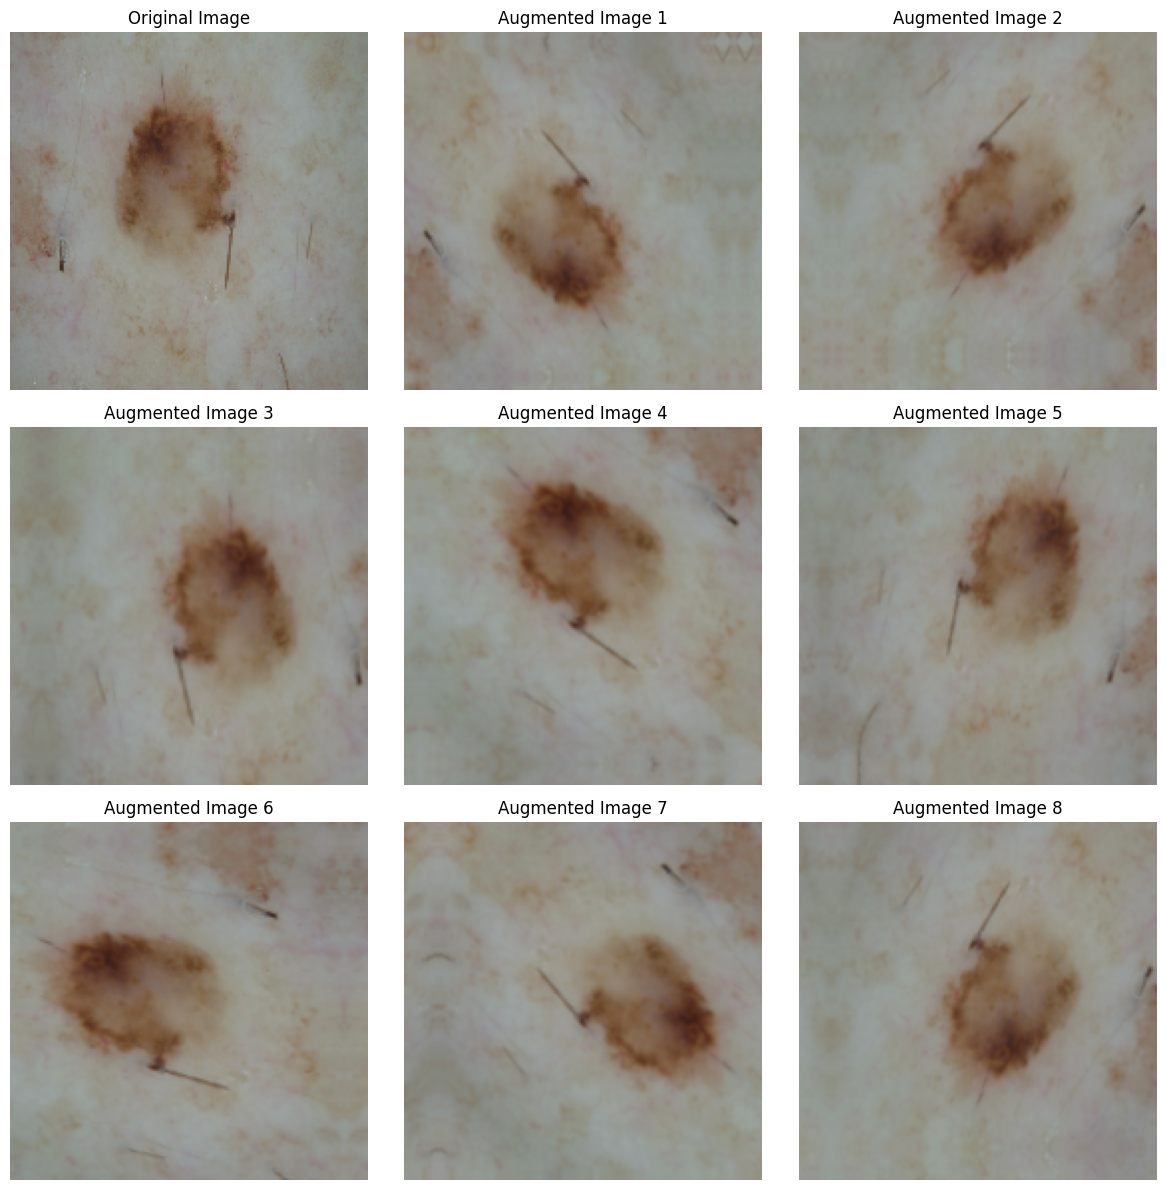

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Get a sample image from the training dataset
for images, labels in train_ds.take(1):
    sample_image = images[0]  # Get the first image
    sample_label = labels[0]  # Get the corresponding label

# Apply augmentation and visualize results
augmented_images = [data_augmentation(tf.expand_dims(sample_image, axis=0)) for _ in range(9)]

# Plot the original and augmented images
plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
plt.imshow(sample_image.numpy().astype("uint8"))
plt.title("Original Image")
plt.axis("off")

for i in range(1, 9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i-1][0].numpy().astype("uint8"))
    plt.title(f"Augmented Image {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()


### Todo:
### Create the model, compile and train the model


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
num_classes = len(class_names)
# Define the CNN model architecture
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalizing pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(num_classes, activation='softmax')  # Output layer for 9 classes
])


### Compiling the model

In [25]:
## Your code goes here

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

# Training the model for 20 epochs
EPOCHS = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.2161 - loss: 2.0824 - val_accuracy: 0.2595 - val_loss: 1.8932
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.2703 - loss: 1.9005 - val_accuracy: 0.3333 - val_loss: 1.7750
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.3488 - loss: 1.7685 - val_accuracy: 0.4273 - val_loss: 1.5980
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.4087 - loss: 1.6066 - val_accuracy: 0.4049 - val_loss: 1.6271
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.4073 - loss: 1.6360 - val_accuracy: 0.4340 - val_loss: 1.6120
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.4521 - loss: 1.5096 - val_accuracy: 0.4810 - val_loss: 1.5372
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.4733 - loss: 1.5032 - val_accuracy: 0.5123 - val_loss: 1.4338
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.4762 - loss: 1.4908 - val_accuracy: 0.5257 - val_loss: 1.

### Visualizing the results

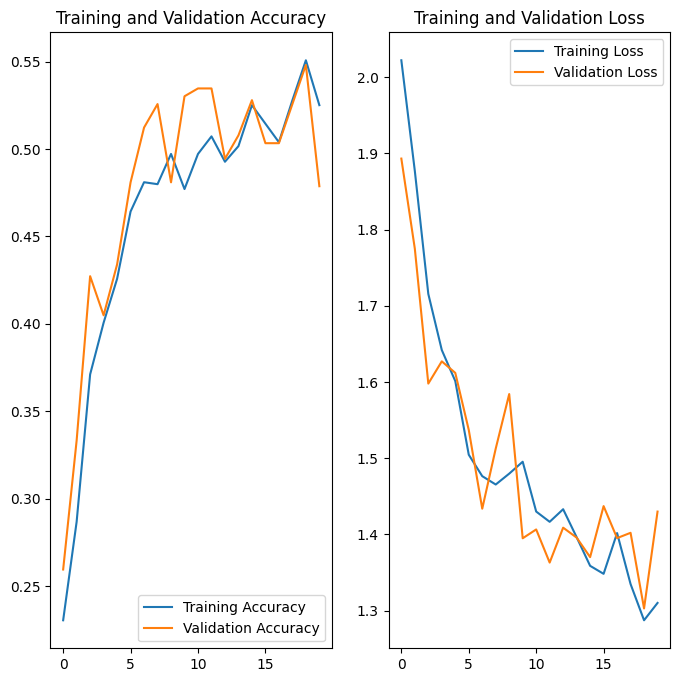

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [28]:
if val_acc[-1] < acc[-1] and val_loss[-1] > loss[-1]:
    print("The model is likely overfitting. Training accuracy is high, but validation accuracy is low.")
elif val_acc[-1] < 0.5:
    print("The model might be underfitting, as validation accuracy is low.")
else:
    print("The model seems to be fitting well.")

The model is likely overfitting. Training accuracy is high, but validation accuracy is low.


In [29]:
# Findings:
if val_acc[-1] < acc[-1] and val_loss[-1] > loss[-1]:
    print("There is evidence of overfitting in the model. The validation accuracy is much lower than the training accuracy, "
          "and the validation loss is increasing while the training loss is decreasing. This suggests that the model is "
          "fitting too closely to the training data and struggling to generalize to unseen data.")

# If improvement compared to previous model run:
if acc[-1] > acc[0] and val_acc[-1] > val_acc[0]:
    print("There has been an improvement compared to the previous model run. Both training and validation accuracy have improved. "
          "The data augmentation and dropout layers have helped reduce overfitting to some extent.")
else:
    print("The improvement is minimal, indicating that further tuning might be needed. Consider trying different data augmentation strategies "
          "or a more regularized model to improve generalization.")

# If no overfitting or underfitting detected:
if abs(acc[-1] - val_acc[-1]) < 0.05 and acc[-1] > 0.8 and val_acc[-1] > 0.8:
    print("The model is showing good generalization, with minimal evidence of overfitting or underfitting. Both training and validation accuracy "
          "are close, and loss values are decreasing. The data augmentation and dropout layers are likely contributing to this balanced performance.")

There is evidence of overfitting in the model. The validation accuracy is much lower than the training accuracy, and the validation loss is increasing while the training loss is decreasing. This suggests that the model is fitting too closely to the training data and struggling to generalize to unseen data.
There has been an improvement compared to the previous model run. Both training and validation accuracy have improved. The data augmentation and dropout layers have helped reduce overfitting to some extent.


In [30]:
# Get the training and validation accuracy from history
training_accuracy = history.history['accuracy'][-1] * 100  # Last epoch training accuracy
validation_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy

print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Training Accuracy: 52.51%
Validation Accuracy: 47.87%


1. Training Accuracy: **52.51%**
2. Validation Accuracy: **47.87%**
3. **Improvement**: There is an improvement compared to the previous model, which had higher training accuracy (79.91%) but lower validation accuracy (50.78%).
4. **Overfitting**: The current model has reduced overfitting compared to the original, but the lower validation accuracy in the latest run suggests the model is still not generalizing well enough.
5. **Underfitting**: Both accuracies are still low, suggesting potential underfitting; the model may not be capturing the complexities of the dataset adequately.
6. ** Next Steps**: Further tuning, enhancing model architecture, and optimizing data augmentation strategies are recommended to improve performance

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

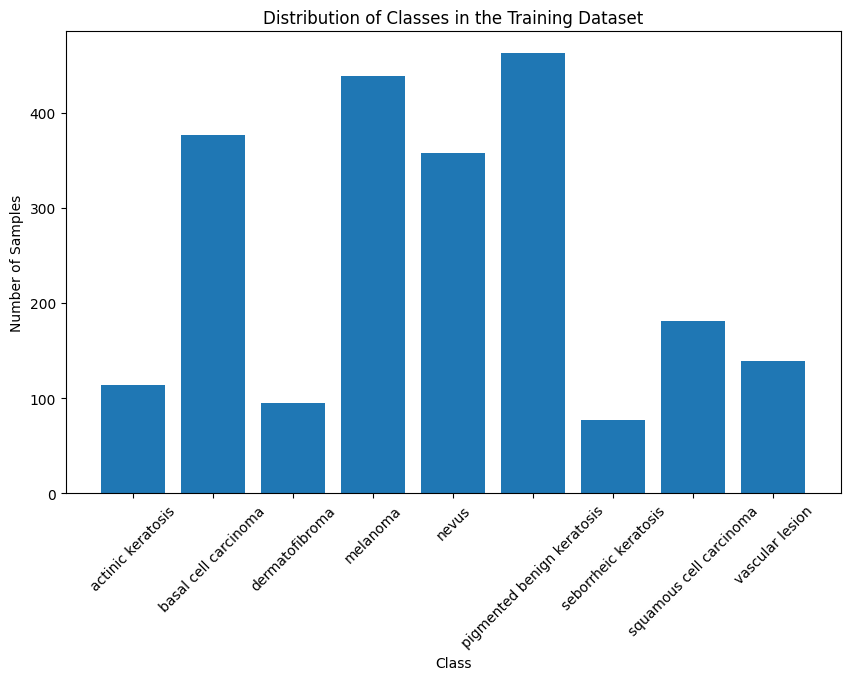

Class actinic keratosis: 114 samples
Class basal cell carcinoma: 376 samples
Class dermatofibroma: 95 samples
Class melanoma: 438 samples
Class nevus: 357 samples
Class pigmented benign keratosis: 462 samples
Class seborrheic keratosis: 77 samples
Class squamous cell carcinoma: 181 samples
Class vascular lesion: 139 samples


In [31]:
## Your code goes here.

# Count the number of samples in each class
class_counts = []

for class_name in class_names:
    class_path = os.path.join(data_dir_train, class_name)
    class_count = len(os.listdir(class_path))
    class_counts.append(class_count)

# Visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in the Training Dataset')
plt.xticks(rotation=45)
plt.show()

# Print class distribution for detailed inspection
for i, count in enumerate(class_counts):
    print(f"Class {class_names[i]}: {count} samples")


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


**Findings**
1. The class seborrheic keratosis has the least number of samples, totaling 77.
2. Dominating classes include pigmented benign keratosis (462 samples), melanoma (438 samples), and basal cell carcinoma (376 samples).
3. This significant class imbalance may lead to biased model performance, favoring majority classes while struggling with minority classes, highlighting the need for techniques to address this issue.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
import Augmentor

path_to_training_dataset = "/content/drive/MyDrive/CNN_assignment/Train/"

for class_name in class_names:
    class_dir = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_dir)

    # Data augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.9)

    # Get the index of the current class and retrieve its count
    class_index = class_names.index(class_name)
    current_count = class_counts[class_index]

    # Generate enough samples to reach 500 total
    samples_to_generate = 500 - current_count if 500 > current_count else 0
    if samples_to_generate > 0:
        p.sample(samples_to_generate)


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB06FDDDE0>: 100%|██████████| 386/386 [00:26<00:00, 14.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB01E40880>: 100%|██████████| 124/124 [00:08<00:00, 14.67 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7CAB01C1B2B0>: 100%|██████████| 405/405 [00:21<00:00, 18.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CAB01C5FB50>: 100%|██████████| 62/62 [00:15<00:00,  4.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB06A77F70>: 100%|██████████| 143/143 [00:31<00:00,  4.50 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB01C5CDC0>: 100%|██████████| 38/38 [00:02<00:00, 17.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7CAB143F90C0>: 100%|██████████| 423/423 [00:47<00:00,  8.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB01CD7D30>: 100%|██████████| 319/319 [00:17<00:00, 17.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7CAB01C6C4C0>: 100%|██████████| 361/361 [00:20<00:00, 17.19 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2261


### Lets see the distribution of augmented data after adding new images to the original training data.

Class counts after augmentation:
actinic keratosis: 500 images
basal cell carcinoma: 500 images
dermatofibroma: 500 images
melanoma: 500 images
nevus: 500 images
pigmented benign keratosis: 500 images
seborrheic keratosis: 500 images
squamous cell carcinoma: 500 images
vascular lesion: 500 images


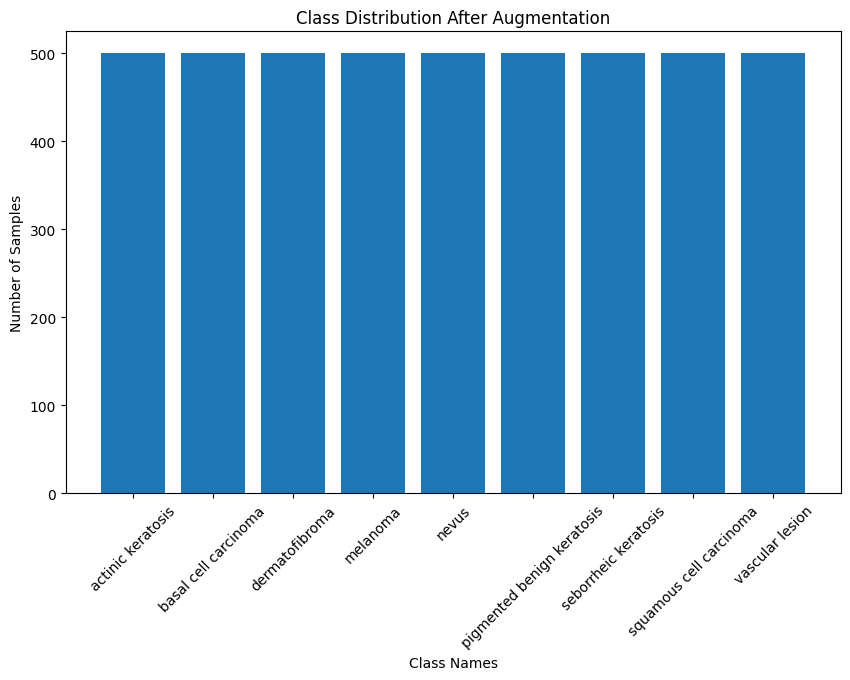

In [37]:
import glob

class_counts_after = {}
for class_name in class_names:
    class_dir = os.path.join(path_to_training_dataset, class_name)
    count = len(glob.glob(os.path.join(class_dir, '*.jpg'))) + len(glob.glob(os.path.join(class_dir, 'output', '*.jpg')))
    class_counts_after[class_name] = count

# Display class counts after augmentation
print("Class counts after augmentation:")
for class_name, count in class_counts_after.items():
    print(f"{class_name}: {count} images")

# Plot class distribution after augmentation
plt.figure(figsize=(10, 6))
plt.bar(class_counts_after.keys(), class_counts_after.values())
plt.xticks(rotation=45)
plt.title('Class Distribution After Augmentation')
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train="/content/drive/MyDrive/CNN_assignment/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [41]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## your code goes here

# Create the CNN model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.1133 - loss: 3.4204 - val_accuracy: 0.1056 - val_loss: 2.1973
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.1119 - loss: 2.1938 - val_accuracy: 0.1056 - val_loss: 2.1975
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.1083 - loss: 2.1962 - val_accuracy: 0.1056 - val_loss: 2.1982
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.1889 - loss: 2.0648 - val_accuracy: 0.3633 - val_loss: 1.7809
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.3511 - loss: 1.7040 - val_accuracy: 0.4144 - val_loss: 1.5294
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.4458 - loss: 1.4249 - val_accuracy: 0.4278 - val_loss: 1.4933
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.4902 - loss: 1.3065 - val_accuracy: 0.4667 - val_loss: 1.4068
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.5172 - loss: 1.2492 - val_accu

#### **Todo:**  Visualize the model results

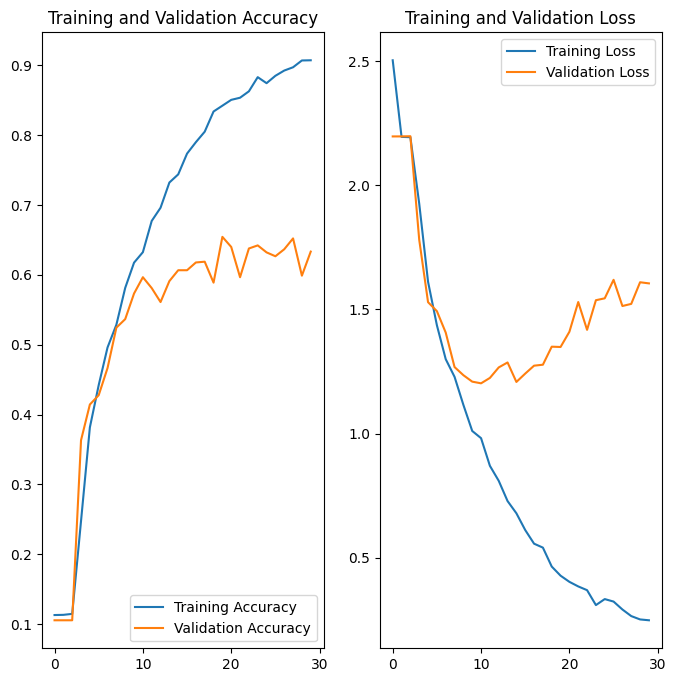

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [46]:
# Get the training and validation accuracy from history
training_accuracy = history.history['accuracy'][-1] * 100  # Last epoch training accuracy
validation_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy

print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Training Accuracy: 90.72%
Validation Accuracy: 63.33%


After class rebalancing, the training accuracy significantly improved, indicating that the model is now learning much better from the data. However, there is still a gap between training and validation accuracy, which suggests overfitting. While the validation accuracy has improved, the model is still not generalizing well to new data.

**Conclusion:**
Class rebalancing helped improve the overall performance, but the model is now overfitting to the training data. More regularization may be required.

**Yes, class rebalancing helped by increasing both training and validation accuracy.** This is evident from the jump in validation accuracy from 47.87% to 63.33%. This suggests that the model is now better at capturing patterns for underrepresented classes, improving generalization to some extent.

In [47]:
!pip install scikit-learn

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━

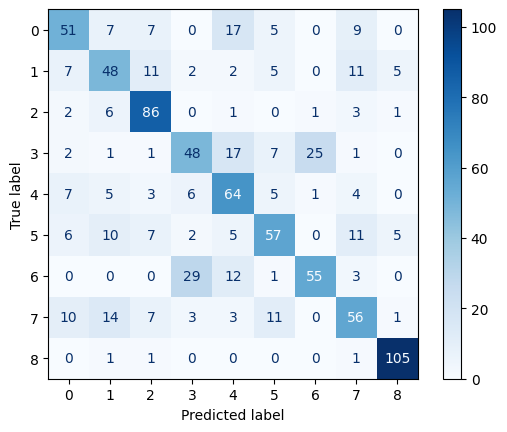

              precision    recall  f1-score   support

     Class 0       0.60      0.53      0.56        96
     Class 1       0.52      0.53      0.52        91
     Class 2       0.70      0.86      0.77       100
     Class 3       0.53      0.47      0.50       102
     Class 4       0.53      0.67      0.59        95
     Class 5       0.63      0.55      0.59       103
     Class 6       0.67      0.55      0.60       100
     Class 7       0.57      0.53      0.55       105
     Class 8       0.90      0.97      0.93       108

    accuracy                           0.63       900
   macro avg       0.63      0.63      0.63       900
weighted avg       0.63      0.63      0.63       900



In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1. Initialize empty lists to store true labels and predicted labels
y_true = []
y_pred = []

# 2. Iterate over validation dataset and collect predictions and true labels
for batch in val_ds:
    images, labels = batch  # 'images' are the input features, 'labels' are the true labels

    # 3. Get model predictions
    predictions = model.predict(images)

    # 4. Convert predictions to class labels (argmax over the probability dimension)
    predicted_classes = np.argmax(predictions, axis=1)

    # 5. Append predicted and true labels to lists
    y_true.extend(labels.numpy())  # Convert Tensor to numpy array
    y_pred.extend(predicted_classes)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 6. Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# 7. Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.show()

# 8. Get unique class labels from the true labels in the validation set
unique_classes = np.unique(y_true)

# 9. Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in unique_classes])
print(report)

**Overall Accuracy:** The model achieved an accuracy of 63%, indicating moderate performance.

**Class Performance Variation:** There is significant variability across classes, with Class 2 and Class 8 performing well (high precision and recall) and Class 1 and Class 3 struggling (low metrics).